# Traffic Road Sign Detection

## Label classes

* Speed limit (20km/h), Label = 0
* Speed limit (30km/h), Label = 1
* Speed limit (50km/h), Label = 2
* Speed limit (60km/h), Label = 3
* Speed limit (70km/h), Label = 4
* Speed limit (80km/h), Label = 5
* speed limit (80km/h), Label = 6
* Speed limit (100km/h), Label = 7
* Speed limit (120km/h), Label = 8
* No passing, Label = 9
* No passing for vehicles over 3.5 metric tons, Label = 10
* Right-of-way at the next intersection, Label = 11 
* Priority road, Label = 12
* Yield, Label = 13
* Stop, Label = 14
* No vehicles, Label = 15
* Vehicles over 3.5 metric tons prohibited, Label = 16
* No entry, Label = 17
* General caution, Label = 18
* Dangerous curve to the left, Label = 19
* Dangerous curve to the right, Label = 20
* Double curve, Label = 21
* Bumpy road, Label = 22
* Slippery road, Label = 23
* Road narrows on the right, Label = 24
* Road work, Label = 25
* Traffic signals, Label = 26
* Pedestrians, Label = 27
* Children crossing, Label = 28
* Bicycles crossing, Label = 29
* Beware of ice/snow, Label = 30
* Wild animals crossing, Label = 31
* End of all speed and passing limits, Label = 32
* Turn right ahead, Label = 33
* Turn left ahead, Label = 34
* Ahead only, Label = 35
* Go straight or right, Label = 36
* Go straight or left, Label = 37
* Keep right, Label = 38
* Keep left, Label = 39
* Roundabout mandatory, Label = 40
* End of no passing, Label = 41
* End of no passing by vehicles over 3.5 metric tons, Label = 42

In [47]:
label_classes = {
    0: 'Speed Limit (20km/h)',
    1: 'Speed Limit (30km/h)',
    2: 'Speed Limit (50km/h)',
    3: 'Speed Limit (60km/h)',
    4: 'Speed Limit (70km/h)',
    5: 'Speed Limit (80km/h)',
    6: 'Speed Limit (80km/h)',
    7: 'Speed Limit (100km/h)',
    8: 'Speed Limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General Caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic Signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

In [1]:
# !pip install pillow

## Importing libraries

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image as im
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import keras
from tensorflow.keras import models, callbacks
from keras import layers
from keras.models import Model
from keras.layers import Input, GlobalAveragePooling2D, concatenate, AveragePooling2D

In [3]:
import pickle

def load_data():
    with open("C://Users//aksha//Downloads//archive//train.p", "rb") as f:
        train = pickle.load(f)

    with open("C://Users//aksha//Downloads//archive//test.p", "rb") as f:
        test = pickle.load(f)

    with open("C://Users//aksha//Downloads//archive//valid.p", "rb") as f:
        valid = pickle.load(f)

    x_train, y_train = train['features'], train['labels']
    x_test, y_test = test['features'], test['labels']
    x_val, y_val = valid['features'], valid['labels']
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    y_val = keras.utils.to_categorical(y_val, num_classes)
    
    return x_train, y_train, x_test, y_test, x_val, y_val

# Convert class vectors to binary class matrices
num_classes = 43

In [4]:
x_train, y_train, x_test, y_test, x_val, y_val = load_data()
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799, 43))

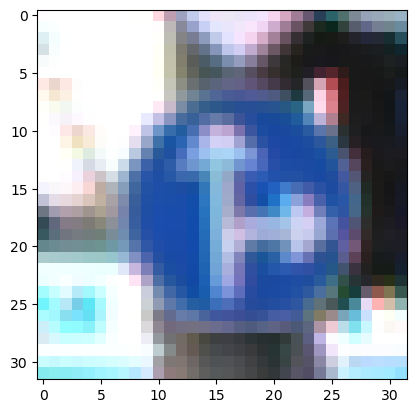

In [5]:
plt.imshow(x_train[1024], cmap='gray')
plt.show()

In [6]:
def train_and_plot(model_name, model, epochs):
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define the checkpoint filename and callback function
    checkpoint_filepath = model_name + '.h5'
    model_checkpoint_callback = callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_loss',
        mode='min',
        save_best_only=True)
    
    stop = callbacks.EarlyStopping(monitor='val_loss', mode = 'min', patience = 30)

    # Train the model
    history = model.fit(x_train, y_train, shuffle=True, verbose=2,
                        validation_data=(x_val, y_val), epochs=epochs, 
                        batch_size=32, callbacks=[stop, model_checkpoint_callback])
    
    # load best model
    model = models.load_model(checkpoint_filepath)
    
    
    # Plot the accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    return model

def test_model(model):
    scores = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])

## Lenet - 5

In [7]:
# Define the input shape
input_shape = (32, 32, 3)

# Define the LeNet-5 model
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    # Max pooling layer 1
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional layer 2
    layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    # Max pooling layer 2
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten the output
    layers.Flatten(),
    # Fully connected layer 1
    layers.Dense(units=120, activation='relu'),
    # Fully connected layer 2
    layers.Dense(units=84, activation='relu'),
    # Output layer
    layers.Dense(units=num_classes, activation='softmax')
])

Epoch 1/10
1088/1088 - 20s - loss: 1.6210 - accuracy: 0.7050 - val_loss: 0.9553 - val_accuracy: 0.7934 - 20s/epoch - 19ms/step
Epoch 2/10
1088/1088 - 18s - loss: 0.3080 - accuracy: 0.9179 - val_loss: 0.7055 - val_accuracy: 0.8678 - 18s/epoch - 17ms/step
Epoch 3/10
1088/1088 - 18s - loss: 0.2163 - accuracy: 0.9432 - val_loss: 0.9949 - val_accuracy: 0.8746 - 18s/epoch - 16ms/step
Epoch 4/10
1088/1088 - 18s - loss: 0.1942 - accuracy: 0.9505 - val_loss: 0.6982 - val_accuracy: 0.8751 - 18s/epoch - 17ms/step
Epoch 5/10
1088/1088 - 18s - loss: 0.1547 - accuracy: 0.9594 - val_loss: 1.0569 - val_accuracy: 0.8685 - 18s/epoch - 17ms/step
Epoch 6/10
1088/1088 - 18s - loss: 0.1550 - accuracy: 0.9630 - val_loss: 0.7842 - val_accuracy: 0.8846 - 18s/epoch - 17ms/step
Epoch 7/10
1088/1088 - 18s - loss: 0.1372 - accuracy: 0.9659 - val_loss: 0.8298 - val_accuracy: 0.9150 - 18s/epoch - 17ms/step
Epoch 8/10
1088/1088 - 18s - loss: 0.1484 - accuracy: 0.9659 - val_loss: 0.6973 - val_accuracy: 0.9039 - 18s/ep

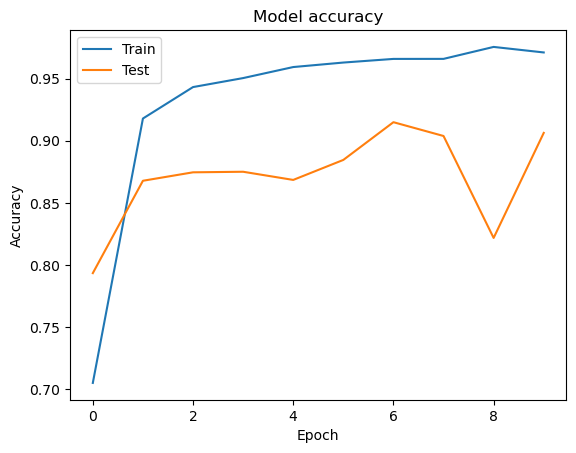

395/395 [==============================] - 3s 8ms/step - loss: 0.9070 - accuracy: 0.8863
Test loss: 0.9069985151290894
Test accuracy: 0.8863024711608887


In [8]:
lesnet_model = train_and_plot('les-net5', model, 10);
test_model(lesnet_model);

## VGG Net

In [9]:
input_shape = (32, 32, 3)

# Define the VGGNet model
model = Sequential([
    # Convolutional layers and max pooling layers for block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layers and max pooling layers for block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional layers and max pooling layers for block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output
    Flatten(),
    
    # Fully connected layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

Epoch 1/10
1088/1088 - 107s - loss: 1.1390 - accuracy: 0.6948 - val_loss: 0.3351 - val_accuracy: 0.9224 - 107s/epoch - 99ms/step
Epoch 2/10
1088/1088 - 122s - loss: 0.1625 - accuracy: 0.9562 - val_loss: 0.2540 - val_accuracy: 0.9476 - 122s/epoch - 112ms/step
Epoch 3/10
1088/1088 - 121s - loss: 0.1180 - accuracy: 0.9685 - val_loss: 0.3176 - val_accuracy: 0.9184 - 121s/epoch - 111ms/step
Epoch 4/10
1088/1088 - 111s - loss: 0.1053 - accuracy: 0.9751 - val_loss: 0.3053 - val_accuracy: 0.9358 - 111s/epoch - 102ms/step
Epoch 5/10
1088/1088 - 110s - loss: 0.0916 - accuracy: 0.9769 - val_loss: 0.2580 - val_accuracy: 0.9388 - 110s/epoch - 101ms/step
Epoch 6/10
1088/1088 - 104s - loss: 0.0977 - accuracy: 0.9762 - val_loss: 0.3695 - val_accuracy: 0.9488 - 104s/epoch - 96ms/step
Epoch 7/10
1088/1088 - 104s - loss: 0.0985 - accuracy: 0.9775 - val_loss: 0.3207 - val_accuracy: 0.9449 - 104s/epoch - 95ms/step
Epoch 8/10
1088/1088 - 102s - loss: 0.1017 - accuracy: 0.9782 - val_loss: 0.3955 - val_accura

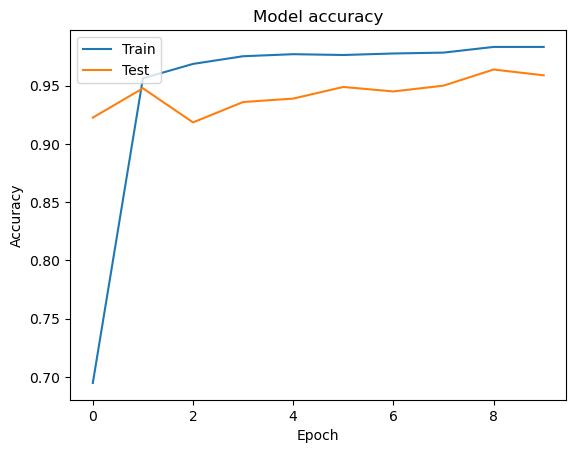

395/395 [==============================] - 13s 31ms/step - loss: 0.3237 - accuracy: 0.9508
Test loss: 0.32366645336151123
Test accuracy: 0.9507521986961365


In [10]:
vgg_model = train_and_plot('vgg-net', model, 10);
test_model(vgg_model);

## Inception-v3

In [11]:
# Define the Inception-v3 model
model = models.Sequential([
    # Input layer
    layers.Input(shape=input_shape),
    
    # Downsampling layer 1
    layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),
    
    # Downsampling layer 2
    layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),

    # Inception modules
    layers.Conv2D(64, kernel_size=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    layers.Conv2D(64, kernel_size=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    layers.Conv2D(64, kernel_size=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    # Flatten the output
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

Epoch 1/10
1088/1088 - 51s - loss: 1.6351 - accuracy: 0.4895 - val_loss: 0.9992 - val_accuracy: 0.6957 - 51s/epoch - 46ms/step
Epoch 2/10
1088/1088 - 47s - loss: 0.4939 - accuracy: 0.8395 - val_loss: 0.5633 - val_accuracy: 0.8429 - 47s/epoch - 43ms/step
Epoch 3/10
1088/1088 - 48s - loss: 0.2921 - accuracy: 0.9104 - val_loss: 0.5755 - val_accuracy: 0.8603 - 48s/epoch - 44ms/step
Epoch 4/10
1088/1088 - 49s - loss: 0.2436 - accuracy: 0.9286 - val_loss: 0.4808 - val_accuracy: 0.8785 - 49s/epoch - 45ms/step
Epoch 5/10
1088/1088 - 47s - loss: 0.2021 - accuracy: 0.9425 - val_loss: 0.5307 - val_accuracy: 0.8678 - 47s/epoch - 43ms/step
Epoch 6/10
1088/1088 - 46s - loss: 0.1936 - accuracy: 0.9445 - val_loss: 0.4357 - val_accuracy: 0.9002 - 46s/epoch - 42ms/step
Epoch 7/10
1088/1088 - 46s - loss: 0.1928 - accuracy: 0.9480 - val_loss: 0.5271 - val_accuracy: 0.8701 - 46s/epoch - 42ms/step
Epoch 8/10
1088/1088 - 46s - loss: 0.1657 - accuracy: 0.9553 - val_loss: 0.4817 - val_accuracy: 0.9025 - 46s/ep

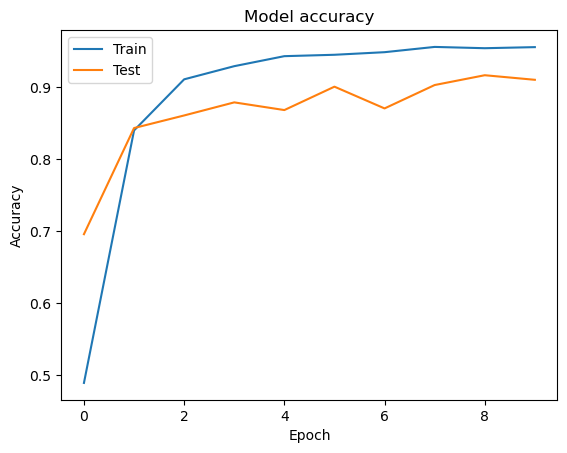

395/395 [==============================] - 8s 19ms/step - loss: 0.6195 - accuracy: 0.8818
Test loss: 0.6195180416107178
Test accuracy: 0.8817893862724304


In [12]:
inception_model = train_and_plot('inception-v3', model, 10);
test_model(inception_model);

## Resnet

In [13]:
# Define the ResNet model
def resnet_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, conv_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.add([x, input_data])
    x = layers.Activation('relu')(x)
    return x

inputs = layers.Input(shape=input_shape)

x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)

num_resnet_blocks = 6
filters = 64
for i in range(num_resnet_blocks):
    x = resnet_block(x, filters, 3)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

Epoch 1/10
1088/1088 - 237s - loss: 1.4640 - accuracy: 0.6130 - val_loss: 0.9242 - val_accuracy: 0.7381 - 237s/epoch - 218ms/step
Epoch 2/10
1088/1088 - 219s - loss: 0.1138 - accuracy: 0.9661 - val_loss: 0.7882 - val_accuracy: 0.8075 - 219s/epoch - 202ms/step
Epoch 3/10
1088/1088 - 239s - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.1794 - val_accuracy: 0.9592 - 239s/epoch - 220ms/step
Epoch 4/10
1088/1088 - 228s - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.4357 - val_accuracy: 0.9120 - 228s/epoch - 210ms/step
Epoch 5/10
1088/1088 - 252s - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.5181 - val_accuracy: 0.8853 - 252s/epoch - 232ms/step
Epoch 6/10
1088/1088 - 225s - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.2127 - val_accuracy: 0.9426 - 225s/epoch - 206ms/step
Epoch 7/10
1088/1088 - 234s - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.1080 - val_accuracy: 0.9696 - 234s/epoch - 215ms/step
Epoch 8/10
1088/1088 - 243s - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.1108 - val_acc

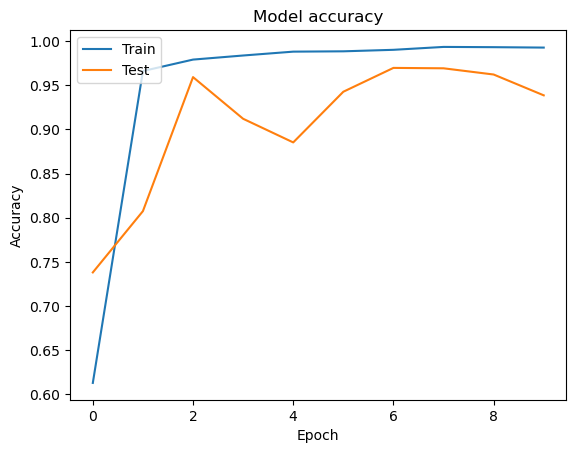

395/395 [==============================] - 29s 73ms/step - loss: 0.2489 - accuracy: 0.9464
Test loss: 0.24890018999576569
Test accuracy: 0.9463974833488464


In [14]:
resnet_model = train_and_plot('resnet', model, 10);
test_model(resnet_model);

## MobileNet

In [15]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define the input shape
# input_shape = (32, 32, 3)

# # Define the MobileNet model
# def mobilenet():
#     inputs = layers.Input(shape=input_shape)

#     x = layers.Conv2D(32, 3, strides=(2, 2), padding='same')(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     x = depthwise_separable_conv_block(x, 64, (1, 1), strides=(1, 1))
#     x = depthwise_separable_conv_block(x, 128, (1, 1), strides=(2, 2))
#     x = depthwise_separable_conv_block(x, 128, (1, 1), strides=(1, 1))
#     x = depthwise_separable_conv_block(x, 256, (1, 1), strides=(2, 2))
#     x = depthwise_separable_conv_block(x, 256, (1, 1), strides=(1, 1))
#     x = depthwise_separable_conv_block(x, 512, (1, 1), strides=(2, 2))
#     for i in range(5):
#         x = depthwise_separable_conv_block(x, 512, (1, 1), strides=(1, 1))
#     x = depthwise_separable_conv_block(x, 1024, (1, 1), strides=(2, 2))
#     x = depthwise_separable_conv_block(x, 1024, (1, 1), strides=(1, 1))

#     x = layers.GlobalAveragePooling2D()(x)
#     outputs = layers.Dense(num_classes, activation='softmax')(x)

#     model = models.Model(inputs, outputs)

#     return model

# def depthwise_separable_conv_block(inputs, filters, kernel_size, strides):
#     x = layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same')(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     x = layers.Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     return x

# # Compile the model
# model = mobilenet()

In [16]:
# mobilenet_model = train_and_plot('mobilenet', model, 10);
# test_model(mobilenet_model);

## Testing with other datasets

In [17]:
def test_model(model_name, model, test_images, test_labels):
    scores = model.evaluate(test_images, test_labels, verbose=1)
    print('\n' + model_name)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    print('*******************************')
    print('')
    
def evaluate_dataset(test_images, test_labels):
    test_model('lesnet', model, test_images, test_labels)
    test_model('vgg-model', vgg_model, test_images, test_labels)
    test_model('inception', inception_model, test_images, test_labels)
    test_model('resnet', resnet_model, test_images, test_labels)
#     test_model('mobilenet', mobilenet_model, test_images, test_labels)

In [18]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Downloads\\Dataset\\Dataset 2\\Train'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the subdirectories in the images directory
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through all the images in the subdirectory
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Load the image using PIL
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize((32, 32))
            # Convert the image to a numpy array
            image = np.array(image)
            # Add the image and its label to the list
            images.append(image)
            labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert class vec`tors to binary class matrices
num_classes = 43
labels = keras.utils.to_categorical(labels, num_classes)

In [19]:
evaluate_dataset(images, labels)

1226/1226 [==============================] - 91s 74ms/step - loss: 0.0773 - accuracy: 0.9774

lesnet
Test loss: 0.07730729132890701
Test accuracy: 0.977428674697876
*******************************

1226/1226 [==============================] - 29s 24ms/step - loss: 0.0409 - accuracy: 0.9913

vgg-model
Test loss: 0.04094230383634567
Test accuracy: 0.9912520051002502
*******************************

1226/1226 [==============================] - 18s 15ms/step - loss: 0.1423 - accuracy: 0.9652

inception
Test loss: 0.1423255056142807
Test accuracy: 0.9651610851287842
*******************************

1226/1226 [==============================] - 75s 61ms/step - loss: 0.0328 - accuracy: 0.9901

resnet
Test loss: 0.03283683583140373
Test accuracy: 0.9900532960891724
*******************************



## Dataset 3

In [20]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Downloads\\Dataset\\Dataset_3\\Train'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the subdirectories in the images directory
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through all the images in the subdirectory
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Load the image using PIL
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize((32, 32))
            # Convert the image to a numpy array
            image = np.array(image)
            # Add the image and its label to the list
            images.append(image)
            labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert class vec`tors to binary class matrices
num_classes = 43
labels = keras.utils.to_categorical(labels, num_classes)


In [21]:
evaluate_dataset(images, labels)

1226/1226 [==============================] - 72s 59ms/step - loss: 0.0773 - accuracy: 0.9774

lesnet
Test loss: 0.07730729132890701
Test accuracy: 0.977428674697876
*******************************

1226/1226 [==============================] - 29s 23ms/step - loss: 0.0409 - accuracy: 0.9913

vgg-model
Test loss: 0.04094230383634567
Test accuracy: 0.9912520051002502
*******************************

1226/1226 [==============================] - 17s 14ms/step - loss: 0.1423 - accuracy: 0.9652

inception
Test loss: 0.1423255056142807
Test accuracy: 0.9651610851287842
*******************************

1226/1226 [==============================] - 74s 61ms/step - loss: 0.0328 - accuracy: 0.9901

resnet
Test loss: 0.03283683583140373
Test accuracy: 0.9900532960891724
*******************************



## Dataset 4

In [22]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Downloads\\Dataset\\Dataset_4\\Train'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the subdirectories in the images directory
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through all the images in the subdirectory
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Load the image using PIL
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize((32, 32))
            # Convert the image to a numpy array
            image = np.array(image)
            # Add the image and its label to the list
            images.append(image)
            labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert class vec`tors to binary class matrices
num_classes = 43
labels = keras.utils.to_categorical(labels, num_classes)


In [23]:
evaluate_dataset(images, labels)

1103/1103 [==============================] - 63s 57ms/step - loss: 0.0776 - accuracy: 0.9773

lesnet
Test loss: 0.07757546752691269
Test accuracy: 0.9773010611534119
*******************************

1103/1103 [==============================] - 24s 22ms/step - loss: 0.0419 - accuracy: 0.9911

vgg-model
Test loss: 0.04188678413629532
Test accuracy: 0.9910734295845032
*******************************

1103/1103 [==============================] - 18s 17ms/step - loss: 0.1400 - accuracy: 0.9652

inception
Test loss: 0.14003126323223114
Test accuracy: 0.9652289748191833
*******************************

1103/1103 [==============================] - 92s 84ms/step - loss: 0.0337 - accuracy: 0.9897

resnet
Test loss: 0.033719588071107864
Test accuracy: 0.9897415637969971
*******************************



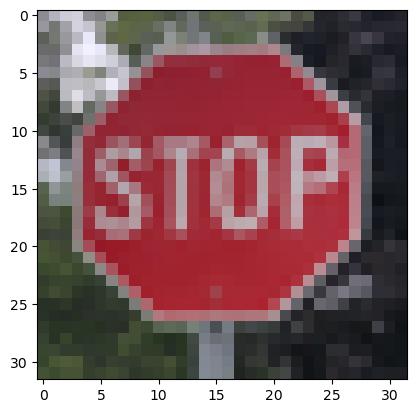

In [38]:
def resize_image(input_image_path, size=(32, 32)):
    image = im.open(input_image_path)
    resized_image = image.resize(size)
    return np.array(resized_image)[np.newaxis, ...]

input_image_path = './stop.jpg'

image = resize_image(input_image_path)
plt.imshow(image[0], cmap='gray')
plt.show()

In [49]:
def predict_image(model_name, model, image):
    prediction = model.predict(image)
    predicted_class_index = np.argmax(prediction[0])
    predicted_probability = prediction[0][predicted_class_index]
    print(model_name)
    print("Predicted class index:", predicted_class_index, " :: Label: ", label_classes[predicted_class_index])
    print("Predicted probability:", predicted_probability)
    print()
    
def predict(image):
#     predict_image('lesnet', lesnet_model, image)
    predict_image('vgg', vgg_model, image)
    predict_image('inception', inception_model, image)
    predict_image('resnet', resnet_model, image)
    
predict(image)

1/1 [==============================] - 0s 19ms/step
vgg
Predicted class index: 14  :: Label:  Stop
Predicted probability: 0.9999975

1/1 [==============================] - 0s 17ms/step
inception
Predicted class index: 14  :: Label:  Stop
Predicted probability: 1.0

1/1 [==============================] - 0s 20ms/step
resnet
Predicted class index: 14  :: Label:  Stop
Predicted probability: 0.999998



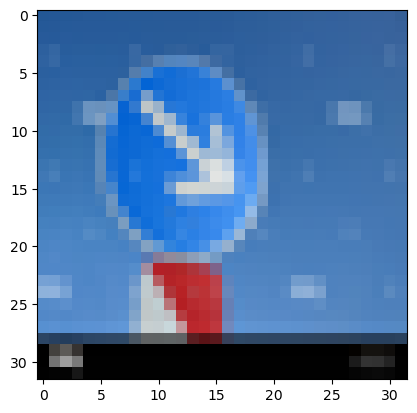

1/1 [==============================] - 0s 18ms/step
vgg
Predicted class index: 34  :: Label:  Turn left ahead
Predicted probability: 0.99966824

1/1 [==============================] - 0s 18ms/step
inception
Predicted class index: 38  :: Label:  Keep right
Predicted probability: 0.62595904

1/1 [==============================] - 0s 22ms/step
resnet
Predicted class index: 38  :: Label:  Keep right
Predicted probability: 0.92634714



In [51]:
input_image_path = './keep-right.jpg'

image = resize_image(input_image_path)
plt.imshow(image[0], cmap='gray')
plt.show()
predict(image)

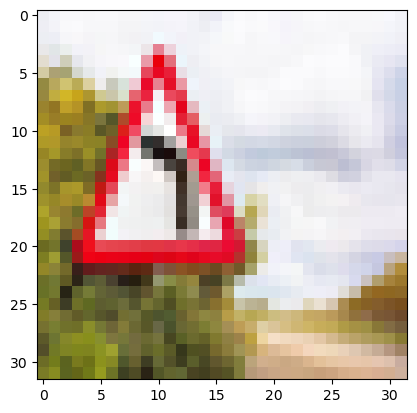

1/1 [==============================] - 0s 45ms/step
vgg
Predicted class index: 1  :: Label:  Speed Limit (30km/h)
Predicted probability: 0.8917743

1/1 [==============================] - 0s 40ms/step
inception
Predicted class index: 1  :: Label:  Speed Limit (30km/h)
Predicted probability: 0.9472954

1/1 [==============================] - 0s 51ms/step
resnet
Predicted class index: 19  :: Label:  Dangerous curve to the left
Predicted probability: 0.5374969



In [54]:
input_image_path = './Dangerous curve to the left.jpeg'

image = resize_image(input_image_path)
plt.imshow(image[0], cmap='gray')
plt.show()
predict(image)